# Used Car Dataset
I am using Kaggle [Used car database ](https://www.kaggle.com/orgesleka/used-cars-database)to do small investigation over second hand cars.

In [216]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

## Reading dataset

In [217]:
# autos.csv has been downloaded and save beside our notebook
df_raw = pd.read_csv('autos.csv', encoding='latin-1')
df = df_raw.copy() #just to keep raw data in memory to later uses
print 'list of columns available in our dataset: '
df.columns

list of columns available in our dataset: 


Index([u'dateCrawled', u'name', u'seller', u'offerType', u'price', u'abtest',
       u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'model',
       u'kilometer', u'monthOfRegistration', u'fuelType', u'brand',
       u'notRepairedDamage', u'dateCreated', u'nrOfPictures', u'postalCode',
       u'lastSeen'],
      dtype='object')

## Clean Data
### dates
Dates are in string format for further investigation it is easier to convert them to datetime objects.

In [218]:
# converting strings to dates
df['dateCrawled'] = df['dateCrawled'].astype('datetime64')
df['dateCreated'] = df['dateCreated'].astype('datetime64')
df['lastSeen'] = df['lastSeen'].astype('datetime64[ns]')

### unimport columns
As we can see below columns carry not enough data, so I am dropping them. All of the nrOfPictures are 0 so it has no data, sellers are 371525 private and just 3 are gewerblich. it is pretty same ifor offerType.

In [221]:
print df.nrOfPictures.sum(), '\n'
print df.seller.value_counts(), '\n'
print df.offerType.value_counts(), '\n'

# drop unimportant columns
df.drop(['nrOfPictures', 'seller', 'offerType' ], axis=1, inplace=True)

0 

privat        371525
gewerblich         3
Name: seller, dtype: int64 

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64 



### names and abtest
df.name contains some valuable data but we are not using it so we are keeping it to use later. We need to do some NLP investigation over it. We can extract information out if it, but let's put it aside now.

I don't know what is abset column is for. So I am dropping it also.

In [222]:
df_with_test_names = df.copy()
df.drop(['name'], axis=1, inplace=True)
df.drop('abtest', axis=1, inplace=True)

### null values
As we can see we have about 110,000 entries with some sort of missing values. The easiest way to deal with them is just ignoring them. We can do more smart actions later, like Expectation Maximization and ....

In [223]:
print 'shape before dropping nulls: ', df.shape
print 'nulls in details(each column): '
for c in df.columns:
    print '   ',c, ':', sum(pd.isnull(df[c]))

df.dropna(inplace=True)
df = df[df['price'] != 0]
df = df[df['price'] < 1000000]
df = df[df['yearOfRegistration'] < 2016]
df = df[df['powerPS'] < 1000]
print 'shape after dropping nulls: ', df.shape

shape before dropping nulls:  (371528, 15)
nulls in details(each column): 
    dateCrawled : 0
    price : 0
    vehicleType : 37869
    yearOfRegistration : 0
    gearbox : 20209
    powerPS : 0
    model : 20484
    kilometer : 0
    monthOfRegistration : 0
    fuelType : 33386
    brand : 0
    notRepairedDamage : 72060
    dateCreated : 0
    postalCode : 0
    lastSeen : 0
shape after dropping nulls:  (257100, 15)


In [224]:
for c in df.columns:
    print c, ':'
    print df[c].describe()
    print '\n'

dateCrawled :
count                  257100
unique                 210972
top       2016-03-31 16:50:28
freq                        5
first     2016-03-05 14:06:22
last      2016-04-07 14:36:58
Name: dateCrawled, dtype: object


price :
count    257100.000000
mean       6773.357114
std       10328.283040
min           1.000000
25%        1600.000000
50%        3900.000000
75%        8750.000000
max      999999.000000
Name: price, dtype: float64


vehicleType :
count        257100
unique            8
top       limousine
freq          75279
Name: vehicleType, dtype: object


yearOfRegistration :
count    257100.000000
mean       2003.349724
std           6.477017
min        1910.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2015.000000
Name: yearOfRegistration, dtype: float64


gearbox :
count      257100
unique          2
top       manuell
freq       196976
Name: gearbox, dtype: object


powerPS :
count    257100.000000
mean        124.730996
std

## Age and Selling time
Register date is a valuable data but in some comparisonal operations is not very useful, so I am calculating of each cars age at the selling date and save them in age_year and age_month columns.

Another very important data to investigate is the minimum time that the advertisement was online. I am keeping this data in min_online_time in hours.

In [229]:
def calcAge(row):
    if row['monthOfRegistration'] != 0:
        res = row['dateCrawled'] - datetime.datetime(row['yearOfRegistration'], row['monthOfRegistration'], 1)
    else:
        res = row['dateCrawled'] - datetime.datetime(row['yearOfRegistration'], 1, 1)
    return int(res.days/30), int(res.days/365)
def calc_min_online_time(row):
    return int((row['lastSeen'] - row['dateCreated']).seconds/3600)

In [230]:
df['min_online_time'] =  df.apply(calc_min_online_time, axis=1)
df[['age_days', 'age_years']] = df.apply(calcAge, axis=1)

KeyboardInterrupt: 

## Data Exploration
Doing some sort of data exploration...

In [ ]:

df = df[df['price'] < 100000]
regr = linear_model.Lasso(alpha=0.1)
x = df['age_days'].values.reshape(len(df), 1)
y = df['price'].values.reshape(len(df), 1)
regr.fit(x, y)


plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue',
         linewidth=3)

In [ ]:
res = []
j = 0
for i in np.unique(x):
    res.append(np.mean(y[x==i]))
    j += 1
plt.plot(np.unique(x), res)

In [174]:
df_not_classic = df[df['age'] < 240]

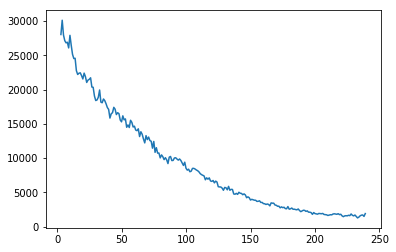

In [177]:
x = df_not_classic['age'].values.reshape(len(df_not_classic), 1)
y = df_not_classic['price'].values.reshape(len(df_not_classic), 1)

res = []
j = 0
for i in np.unique(x):
    res.append(np.mean(y[x==i]))
    j += 1
plt.plot(np.unique(x), res)

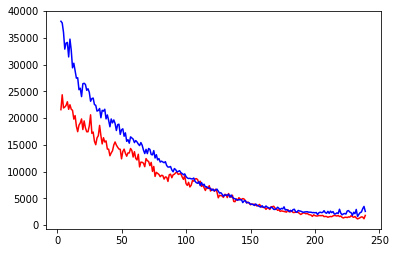

In [190]:
x_b = df_not_classic[df_not_classic['fuelType'] == 'benzin']['age'].values.reshape(len(df_not_classic[df_not_classic['fuelType'] == 'benzin']), 1)
y_b = df_not_classic[df_not_classic['fuelType'] == 'benzin']['price'].values.reshape(len(df_not_classic[df_not_classic['fuelType'] == 'benzin']), 1)
res_b = []
for i in np.unique(x_b):
    res_b.append(np.mean(y_b[x_b==i]))
       
x_d = df_not_classic[df_not_classic['fuelType'] == 'diesel']['age'].values.reshape(len(df_not_classic[df_not_classic['fuelType'] == 'diesel']), 1)
y_d = df_not_classic[df_not_classic['fuelType'] == 'diesel']['price'].values.reshape(len(df_not_classic[df_not_classic['fuelType'] == 'diesel']), 1)
res_d = []
for i in np.unique(x_d):
    res_d.append(np.mean(y_d[x_d==i]))
    
plt.plot(np.unique(x_b), res_b, color='r')
plt.plot(np.unique(x_d), res_d, color='b')

In [207]:
group = df.groupby(['brand'])[['price', 'kilometer', 'powerPS', 'age', 'min_online_time']]

In [215]:
group.mean()

,price,kilometer,powerPS,age
brand,,,,
alfa_romeo,4710.906157,128135.086671,139.928870,163.423790
audi,10163.549094,127267.846898,165.288460,138.020613
bmw,9255.344704,131809.136818,172.600515,149.877094
chevrolet,7307.691099,98433.059088,135.631264,149.703815
chrysler,4564.871257,134141.716567,160.572854,171.117764
citroen,4096.216566,118800.220143,93.225096,138.722069
dacia,6053.378830,85473.537604,85.267409,65.855153
daewoo,1127.928358,124268.656716,76.740299,169.519403
daihatsu,2075.930966,116489.151874,64.911243,159.646943
